In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Discrete fourier transform

In [7]:
from scipy.fft import fft, fftfreq, ifft

In [8]:
t = 40 # time/s
n = 100 # measurements
tv = np.linspace(0, t, n)
dt = tv[1] - tv[0]

In [9]:
f1 = 20/(n*dt)
f2 = 10/(n*dt)
f3 = (10+5*n)/(n*dt)

In [10]:
x1 = np.sin(2*np.pi*f1*tv) + 0.3*np.sin(2*np.pi*f2*tv)
x2 = np.sin(2*np.pi*f2*tv)
x3 = np.sin(3*np.pi*f3*tv)

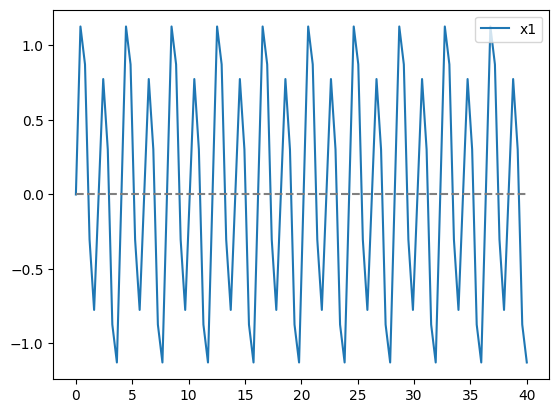

In [11]:
plt.plot(tv, x1, label="x1")
plt.plot(tv, np.zeros(tv.shape), "--", color="Grey")
plt.legend()

In [12]:
f1 = fftfreq(len(tv), dt)
x1_FFT = fft(x1)

In [13]:
f1

array([ 0.     ,  0.02475,  0.0495 ,  0.07425,  0.099  ,  0.12375,
        0.1485 ,  0.17325,  0.198  ,  0.22275,  0.2475 ,  0.27225,
        0.297  ,  0.32175,  0.3465 ,  0.37125,  0.396  ,  0.42075,
        0.4455 ,  0.47025,  0.495  ,  0.51975,  0.5445 ,  0.56925,
        0.594  ,  0.61875,  0.6435 ,  0.66825,  0.693  ,  0.71775,
        0.7425 ,  0.76725,  0.792  ,  0.81675,  0.8415 ,  0.86625,
        0.891  ,  0.91575,  0.9405 ,  0.96525,  0.99   ,  1.01475,
        1.0395 ,  1.06425,  1.089  ,  1.11375,  1.1385 ,  1.16325,
        1.188  ,  1.21275, -1.2375 , -1.21275, -1.188  , -1.16325,
       -1.1385 , -1.11375, -1.089  , -1.06425, -1.0395 , -1.01475,
       -0.99   , -0.96525, -0.9405 , -0.91575, -0.891  , -0.86625,
       -0.8415 , -0.81675, -0.792  , -0.76725, -0.7425 , -0.71775,
       -0.693  , -0.66825, -0.6435 , -0.61875, -0.594  , -0.56925,
       -0.5445 , -0.51975, -0.495  , -0.47025, -0.4455 , -0.42075,
       -0.396  , -0.37125, -0.3465 , -0.32175, -0.297  , -0.27

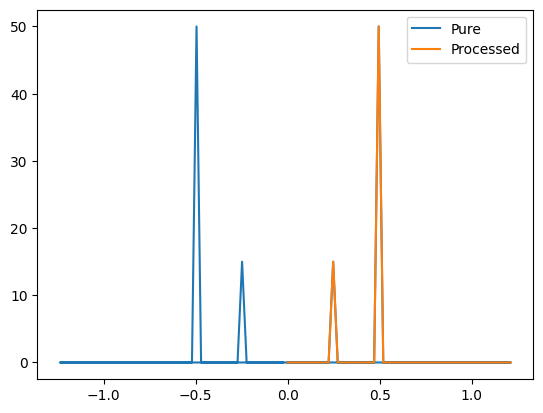

In [14]:
plt.plot(f1, np.abs(x1_FFT), label="Pure")
plt.plot(f1[:n//2], np.abs(x1_FFT[:n//2]), label="Processed")
plt.legend()

# Test

In [15]:
n = 100
dt = 0.1
x = np.linspace(0, n*dt, n)

In [16]:
y = 3 * np.sin(2*x) + 4 * np.cos(4*x)
y1 = y + np.random.randn(x.shape[0])

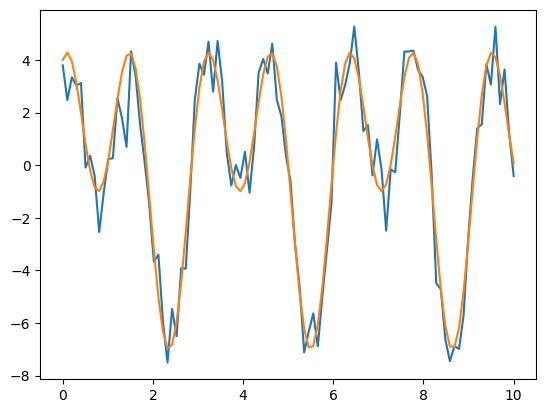

In [17]:
plt.plot(x, y1)
plt.plot(x, y)

In [18]:
freqs = fftfreq(n, dt)
y1_fft = fft(y1)
y1_fa = abs(y1_fft)

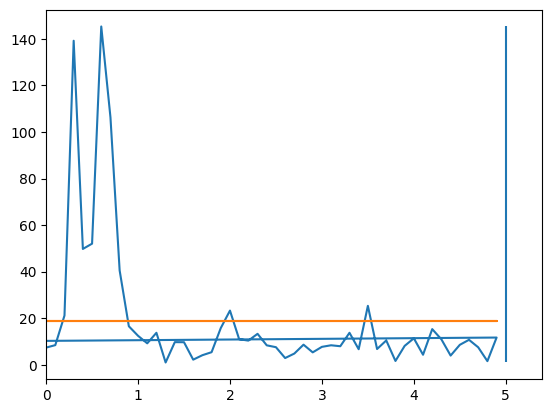

In [19]:
plt.plot(freqs, y1_fa)
plt.plot(freqs, np.full(freqs.shape, y1_fa.mean()))
plt.xlim(left=0)
nyquist = 1/(2*dt)
plt.vlines(nyquist, min(y1_fa), max(y1_fa))

In [20]:
df = np.diff(y1_fft)
tp_cond = df[: -1] * df[1: ] < 0
tp = y1_fft[1:-1][tp_cond]
xtp = freqs[1:-1][tp_cond]
tp

array([ -7.41337985+49.1941444j , -15.30656838-37.49418026j,
         1.30010067-16.47191947j,   1.70066211-12.3148033j ,
        -7.64848559 -5.91452878j,  -1.91073699 +1.0419113j ,
         2.05229261 -4.97907472j,  23.12164199 +2.57229711j,
        -9.87314098 -3.11933522j,  -3.86030814 -2.8470242j ,
         6.85350654 -5.21522864j,   0.84365004 -5.24255719j,
         7.67234894 +0.30160542j,   7.2174669  -3.31728327j,
        12.1825411  -6.31075035j,  -2.66230491 -6.10081636j,
        -6.73704997 +0.33066019j,   1.54966087 +0.44272994j,
         9.1646806  +6.68475182j,   0.40047759 +4.26718224j,
        -0.69616975 +3.86822556j,   6.81647557 +3.10746368j,
        -9.26199415 +7.10460713j,   8.78751803 -0.j        ,
        -9.26199415 -7.10460713j,   6.81647557 -3.10746368j,
        -0.69616975 -3.86822556j,   0.40047759 -4.26718224j,
         9.1646806  -6.68475182j,   1.54966087 -0.44272994j,
        -6.73704997 -0.33066019j,  -2.66230491 +6.10081636j,
        12.1825411  +6.3

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


(0.0, 2.0)

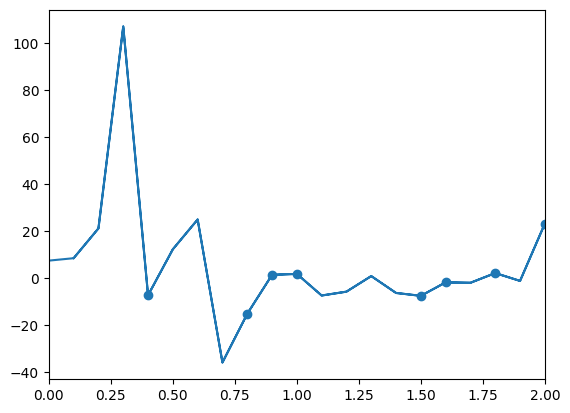

In [21]:
plt.plot(abs(freqs), y1_fft)
plt.scatter(xtp, tp)
plt.xlim(0, 2)

# Non sinusoinal

In [298]:
np.random.seed(28)
def fourier(fn: callable, s=0, dt=0.001, n=1000, noise=False):
    x = np.linspace(s, s+dt*n, n)
    y = fn(x)
    if noise:
        y += np.random.normal(0, 1, x.shape)
    freqs = fftfreq(n, dt)
    yfft = fft(y)
    return x, y, freqs, yfft

In [307]:
x, y, freqs, yfft = fourier(lambda x: -70*x**4 + 120*x**3 - 60*x**2 + 12*x, noise=True)
ya = abs(yfft)

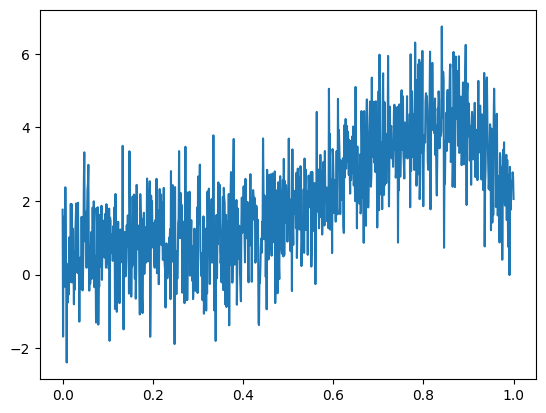

In [308]:
plt.plot(x, y)

In [310]:
def filter(yfft, pct=25):
    ya = abs(yfft)
    cop = np.percentile(ya, pct)
    yfft[ya <= cop] = 0
    return yfft

In [311]:
def freq_filter(freqs, yfft, pct=25):
    ya = abs(yfft)
    cop = np.percentile(freqs[freqs>0], pct)
    yfft[(freqs >= cop) | (freqs <= -cop)] = 0
    return yfft

In [312]:
y_freq_filtered = freq_filter(freqs, yfft)
y_freq_processed = ifft(y_freq_filtered)

In [313]:
y_filtered = filter(yfft)

y_processed = ifft(y_filtered)

(0.0, 499.0)

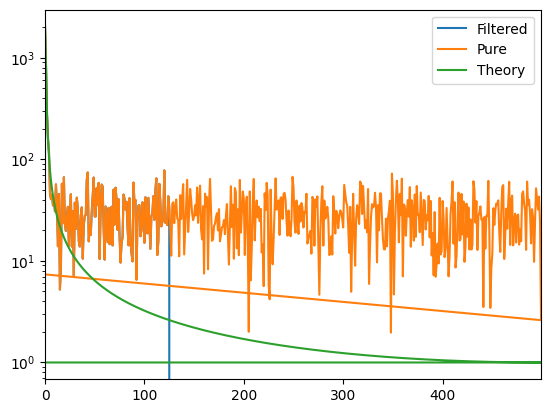

In [314]:
plt.plot(freqs, abs(y_freq_filtered), label="Filtered")
plt.plot(freqs, ya, label="Pure")
plt.plot(freqs, abs(fft(-70*x**4 + 120*x**3 - 60*x**2 + 12*x)), label="Theory")
plt.yscale("log")
plt.legend()
plt.xlim(0, max(freqs))

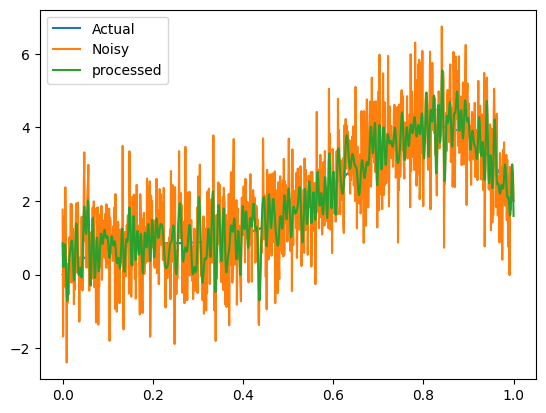

In [315]:
plt.plot(x, -70*x**4 + 120*x**3 - 60*x**2 + 12*x, label="Actual")
plt.plot(x, y, label="Noisy")
plt.plot(x, y_processed, label="processed")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


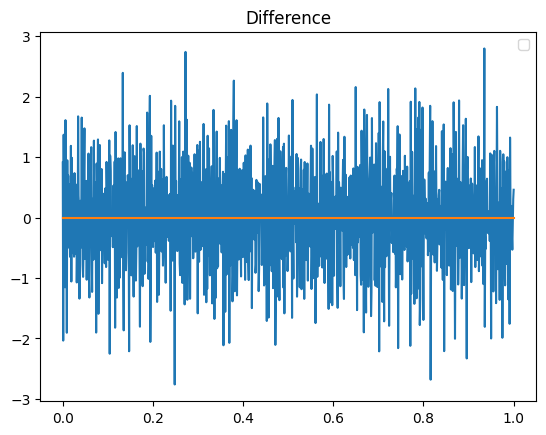

In [316]:
plt.title("Difference")
# plt.plot(x, abs(x**2-x - y), label="Noisy")
# plt.plot(x, abs(x**2-x - y_processed), label="Processed")
plt.plot(x, y-y_processed)
plt.plot(x, np.zeros_like(x))
plt.legend()